Importing the libraries and read the csv file

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')

In [112]:
carPrice = pd.read_csv('CarPrice_Assignment.csv')
carPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [113]:
carPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [114]:
carPrice.describe

<bound method NDFrame.describe of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible 

In [115]:
carPrice.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [116]:
# encoding non-int and non-float to integer values
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
data = carPrice
data['fuelsystem']=lab.fit_transform(data['fuelsystem'])
data['cylindernumber']=lab.fit_transform(data['cylindernumber'])
data['enginetype']=lab.fit_transform(data['enginetype'])
data['enginelocation']=lab.fit_transform(data['enginelocation'])
data['drivewheel']=lab.fit_transform(data['drivewheel'])
data['carbody']=lab.fit_transform(data['carbody'])
data['doornumber']=lab.fit_transform(data['doornumber'])
data['aspiration']=lab.fit_transform(data['aspiration'])
data['fueltype']=lab.fit_transform(data['fueltype'])
data['CarName']=lab.fit_transform(data['CarName'])

In [117]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int64  
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [119]:
data.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,77.209756,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,...,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,41.014583,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,44.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,80.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,115.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,146.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Split the value of x and y variable. x takes all the features from 1 to 25 column including all the rows and y is dependent variable which takes all the rows and only column 26th (Price).

In [120]:
x = data.iloc[:,1:25]
y = data.iloc[:,25]

In [121]:
x

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,2,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,3,3,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,1,1,1,0,1,2,2,0,94.5,171.2,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,2,4,1,0,0,3,1,0,99.8,176.6,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,2,5,1,0,0,3,0,0,99.4,176.6,...,1,136,5,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,139,1,0,0,3,2,0,109.1,188.8,...,2,141,5,3.78,3.15,9.5,114,5400,23,28
201,-1,138,1,1,0,3,2,0,109.1,188.8,...,2,141,5,3.78,3.15,8.7,160,5300,19,25
202,-1,140,1,0,0,3,2,0,109.1,188.8,...,3,173,5,3.58,2.87,8.8,134,5500,18,23
203,-1,142,0,1,0,3,2,0,109.1,188.8,...,3,145,3,3.01,3.40,23.0,106,4800,26,27


In [122]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

spliting the dataset into 80 % training dataset and 20% test dataset

In [123]:
# Multiple Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [124]:
regressor.intercept_

-60983.64905136867

In [125]:
regressor.coef_

array([ 2.82055665e+02, -2.79991435e+01,  4.28206674e+03,  1.07680239e+03,
       -1.65075698e+03, -9.47611813e+02,  1.20823269e+03,  1.36912712e+04,
        1.62921757e+02, -3.62401365e+01,  6.41330367e+02,  1.08151190e+02,
        3.99430610e+00,  1.45678927e+02,  8.72419901e+01,  7.02385648e+01,
        4.75947039e+01, -2.01117537e+03, -2.85018993e+03,  3.56525533e+02,
        1.30591524e+01,  1.26751143e+00,  2.72767031e+01, -2.00807244e+01])

In [126]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(x_test)
print(r2_score(y_test,y_pred))

0.8113230018091947


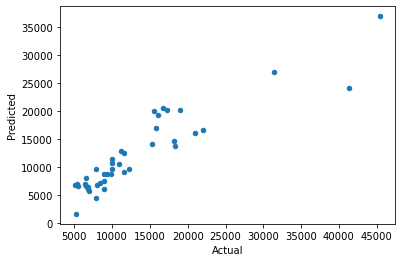

In [127]:
df = pd.DataFrame({'Actual':y_test.values, 'Predicted':y_pred})
ax1 = df.plot.scatter(x='Actual', y='Predicted')

In [128]:
from sklearn.metrics import mean_squared_error

rmse_test=mean_squared_error(y_test, y_pred, squared=False)
rmse_test

3821.8694483494232

In [129]:
df

,Actual,Predicted
0,6795.0,6066.214434
1,15750.0,16991.493884
2,15250.0,14099.076923
3,5151.0,1690.737650
4,9995.0,9688.256422
5,11199.0,12981.631540
6,5389.0,7065.229817
7,7898.0,4548.282282
8,17199.0,20223.979563
9,6529.0,8034.311506


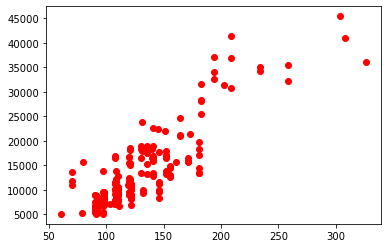

In [130]:
import matplotlib.pyplot as plt
import numpy as np
x_poly = x['enginesize']
x_poly = np.array(x_poly)
x_poly = x_poly.reshape(-1,1)
y_poly = y
y_poly = np.array(y_poly)
plt.scatter(x_poly, y_poly, color = 'red')

In [131]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures
x_train, x_test, y_train, y_test = train_test_split(x_poly, y_poly, test_size=0.2, random_state=0)
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
y_pred = lin_reg_2.predict(X_poly)
print(r2_score(y_train, y_pred))

0.789919571194587


In [133]:
from sklearn.metrics import mean_squared_error

rmse_train=mean_squared_error(y_train, y_pred, squared=False)
rmse_train

3551.21542951204

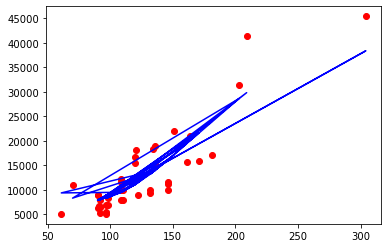

In [134]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, lin_reg_2.predict(poly_reg.fit_transform(x_test)), color = 'blue')
plt.show()

Most of the variables can explain the variances in the car price. The accuracy of the model in predicting the car price is measured with RMSE, with training data has RMSE of 78.99 and testing data has RMSE of 81.13.

The root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample and population values) predicted by a model and the values actually observed. The RMSE for your training and your test sets should be very similar if you have built a good model and here we have RMSE for test and train data very close